# Machine Learning 2023/2024

## Third Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

### Loading the Dataset

In [2]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

In [3]:
print(col_names)

['D00', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'FP0000', 'FP0001', 'FP0002', 'FP0003', 'FP0004', 'FP0005', 'FP0006', 'FP0007', 'FP0008', 'FP0009', 'FP0010', 'FP0011', 'FP0012', 'FP0013', 'FP0014', 'FP0015', 'FP0016', 'FP0017', 'FP0018', 'FP0019', 'FP0020', 'FP0021', 'FP0022', 'FP0023', 'FP0024', 'FP0025', 'FP0026', 'FP0027', 'FP0028', 'FP0029', 'FP0030', 'FP0031', 'FP0032', 'FP0033', 'FP0034', 'FP0035', 'FP0036', 'FP0037', 'FP0038', 'FP0039', 'FP0040', 'FP0041', 'FP0042', 'FP0043', 'FP0044', 'FP0045', 'FP0046', 'FP0047', 'FP0048', 'FP0049', 'FP0050', 'FP0051', 'FP0052', 'FP0053', 'FP0054', 'FP0055', 'FP0056', 'FP0057', 'FP0058', 'FP0059', 'FP0060', 'FP0061', 'FP0062', 'FP0063', 'FP0064', 'FP0065', 'FP0066', 'FP0067', 'FP0068', 'FP0069'

In [8]:
print(X_train.shape)
X_train

(7337, 2132)


array([[541.28013798, 541.656     ,  10.        , ...,   0.        ,
          0.        ,   0.        ],
       [426.19771382, 426.582     ,   5.        , ...,   0.        ,
          0.        ,   0.        ],
       [348.18377801, 348.446     ,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [510.31787387, 510.802     ,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       [393.18748348, 393.556     ,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       [484.0561233 , 485.462     ,   6.        , ...,   0.        ,
          0.        ,   0.        ]])

In [7]:
print(y_train.shape)
y_train

(7337,)


array([0.65494719, 0.64999509, 0.15494719, ..., 0.2934813 , 0.59680404,
       0.77697635])

<h3>Finguring out the Dependent Variable (Column)</h3>

<h3>Objective:<br> Produce the best regression model for y_ivs (Dependent Variable)</h3>

Decision tree Regression model

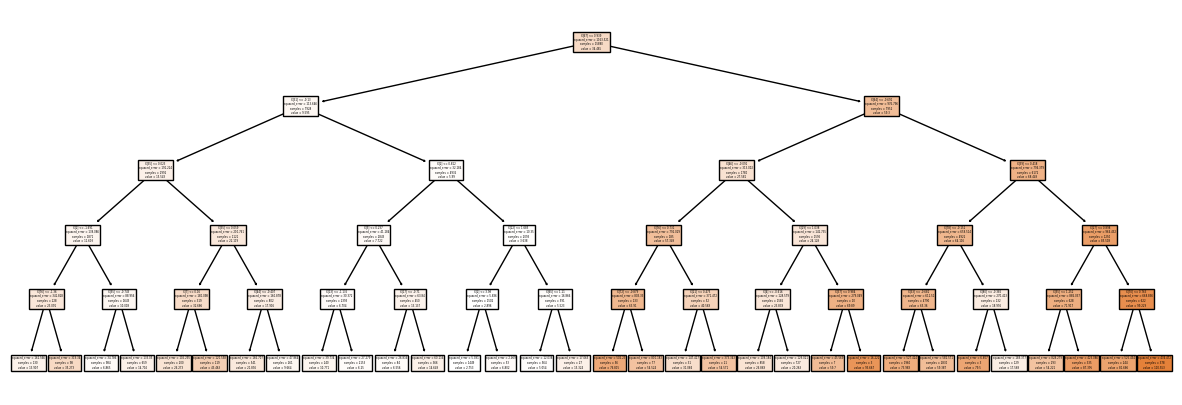

In [5]:
dmdl = DecisionTreeRegressor(max_depth=5)
dmdl.fit(X_train, y_train)

dtr_preds=dmdl.predict(X_test)

#explained_variance_score(y_test, dtr_preds)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dmdl, filled=True)#, feature_names= df.columns)
plt.show()

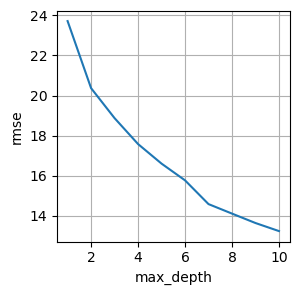

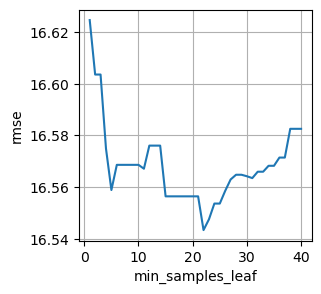

In [6]:
rmses_i = []
rmses_j = []

#def statGraph()
for i in range(1, 11):
    dmdl_i = DecisionTreeRegressor(max_depth=i)
    dmdl_i.fit(X_train, y_train)
    
    preds_i=dmdl_i.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_i.append(mean_squared_error(y_test, preds_i, squared=False))
    
for i in range(1, 41):
    dmdl_j = DecisionTreeRegressor(max_depth=5, min_samples_leaf= i)
    dmdl_j.fit(X_train, y_train)
    
    preds_j=dmdl_j.predict(X_test)
    #= explained_variance_score(y_test, preds)
    rmses_j.append(mean_squared_error(y_test, preds_j, squared=False))

plt.figure(figsize=(3,3))
plt.plot(range(1, 11), rmses_i)
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
plt.plot(range(1, 41), rmses_j)
plt.xlabel("min_samples_leaf")
plt.ylabel("rmse")
plt.grid()
plt.show()

Linear Regression model

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)

lr_preds=reg.predict(X_test)

#explained_variance_score(y_test, lr_preds)

Alternative linear regression model using statusmodel implementation

In [8]:
X_tr = add_constant(X_train)
reg2=OLS(y_train,X_tr, hasconst=12).fit()
reg2.summary()

#alr_preds= reg2.predict(X_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     550.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:43:06   Log-Likelihood:                -67939.
No. Observations:               15880   AIC:                         1.360e+05
Df Residuals:                   15798   BIC:                         1.367e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5735      0.139    248.859      0.000      34.301      34.846
x1            -4.9599      1.247     -3.976      0.000      -7.405      -2.515
x2            23.2267      2.831      8.205      0.000      17.678      28.775
x3           -27.5655      3.956     -6.969      0.000     -35.319     -19.812
x4           -13.8199      2.938     -4.704      0.000     -19.579      -8.061
x5            20.6481      4.121      5.010      0.000      12.571      28.726
x6           -12.7071      1.925     -6.599      0.000     -16.481      -8.933
x7             1.8224      1.689      1.079      0.281      -1.489       5.133
x8            12.3533      1.040     11.873      0.000      10.314      14.393
x9             0.5702      0.681      0.837      0.402      -0.765       1.905
x10          -11.1099      1.461     -7.605      0.000     -13.973      -8.247
x11            1.2602      1.270      0.992      0.321      -1.229       3.749
x12           13.4276      6.296      2.133      0.033       1.087      25.768
x13          -25.6596     12.726     -2.016      0.044     -50.604      -0.716
x14          -11.8388      5.576     -2.123      0.034     -22.768      -0.910
x15           24.1836     10.511      2.301      0.021       3.580      44.787
x16          -44.8919      8.890     -5.050      0.000     -62.317     -27.467
x17           15.4199      1.822      8.465      0.000      11.849      18.991
x18           20.4103      2.298      8.882      0.000      15.906      24.915
x19            4.4433      0.938      4.736      0.000       2.604       6.282
x20          -21.6203      2.836     -7.624      0.000     -27.179     -16.062
x21           -1.8759      3.022     -0.621      0.535      -7.799       4.047
x22          -10.8573      4.232     -2.565      0.010     -19.153      -2.561
x23           91.3110      8.066     11.321      0.000      75.501     107.121
x24            5.0213      4.654      1.079      0.281      -4.101      14.144
x25         -100.5243      9.829    -10.228      0.000    -119.789     -81.259
x26           29.3096      7.606      3.853      0.000      14.400      44.219
x27           15.2681      2.469      6.184      0.000      10.429      20.107
x28           10.8068      1.708      6.328      0.000       7.460      14.154
x29           -3.5231      0.641     -5.493      0.000      -4.780      -2.266
x30           -5.8020      2.599     -2.233      0.026     -10.896      -0.708
x31           -8.7377      2.568     -3.403      0.001     -13.771      -3.705
x32          -11.6224      1.642     -7.080      0.000     -14.840      -8.405
x33           -1.7475      2.234     -0.782      0.434      -6.126       2.631
x34            1.4322      2.030      0.705      0.481      -2.547       5.412
x35           11.4623      2.649      4.327      0.000       6.270      16.655
x3

Regularized linear models

Ridge Regression model

In [9]:
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

ridge_preds=ridge.predict(X_test)

The bias is:  34.57197419584233
The other parameters are: 


Lasso Regression model

In [10]:
lasso = Lasso(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  lasso.intercept_)
print("The other parameters are: ")
#for i, beta in enumerate(ridge.coef_):
#    print("\t B%02d -> %9.3f"% (i+1, beta))

lasso_preds= lasso.predict(X_test)

The bias is:  34.46923180502305
The other parameters are: 


Gráficos

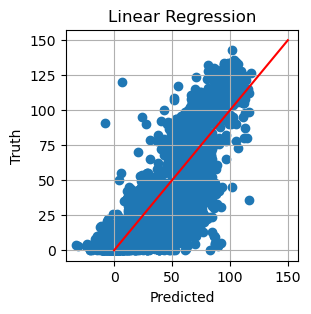

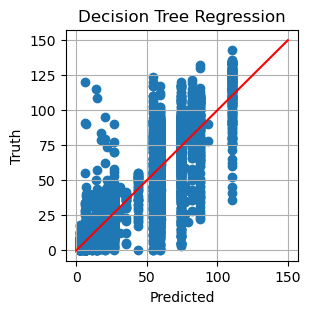

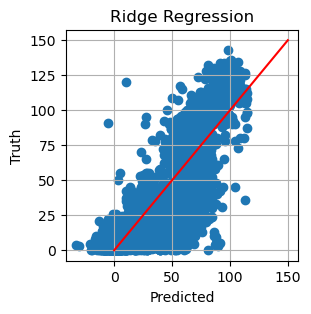

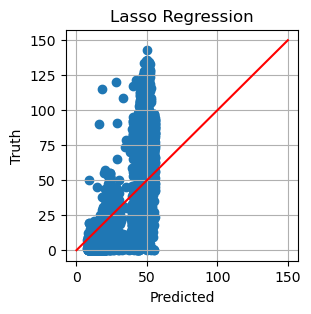

In [11]:
def drawGraf(preds, title):
    plt.figure(figsize=(3,3))
    plt.scatter(preds, y_test)
    plt.plot((0, 150), (0,150), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(title)
    plt.show()


#####  Gráfico linear regression #########
drawGraf(lr_preds, "Linear Regression")

#####  Gráfico decision tree regression #########
drawGraf(dtr_preds, "Decision Tree Regression")

#####  Gráfico ridge regression #########
drawGraf(ridge_preds, "Ridge Regression")

#####  Gráfico lasso regression #########
drawGraf(lasso_preds, "Lasso Regression")

In [12]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

In [ ]:
###############   Métricas de avaliação de decision tree regression
print("Métricas de avaliação de decision tree regression:")
printAvalStat(y_test, dtr_preds)

###############   Métricas de avaliação de linear regression
print("Métricas de avaliação de linear regression:")
printAvalStat(y_test, lr_preds)

###############   Métricas de avaliação de ridge regression
print("Métricas de avaliação de ridge regression:")
printAvalStat(y_test, ridge_preds)

###############   Métricas de avaliação de lasso regression
print("Métricas de avaliação de lasso regression:")
printAvalStat(y_test, lasso_preds)